In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [32]:
df = pd.read_excel('Assignment - Hiring (Product Partnership Analyst).xlsx')
df.head()

,vehicleNumber,class,vehicleManufacturerName,model,vehicleColour,type,owner,ownerFatherName,regAuthority,regDate,...,permitValidUpto,nonUseStatus,nonUseFrom,nonUseTo,nationalPermitNumber,nationalPermitUpto,nationalPermitIssuedBy,isCommercial,nocDetails,error
0,5,M-Cycle/Scooter,BAJAJ AUTO LTD,PULSAR 150 DTSI,COCKT. WINE RED,PETROL,VIKAS CHAUHAN,NaN,"ALIGARH RTO, UTTAR PRADESH",2015-12-01 00:00:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,4,M-Cycle/Scooter,TVS MOTOR COMPANY LTD,TVS APACHE RTR 160 (BS IV),WHITE,PETROL,AASIM KHAN,SHAN AHMAD,"HAPUR, UTTAR PRADESH",18/04/2018,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,6,M-Cycle/Scooter(2WN),TVS MOTOR COMPANY LTD,STAR CITY,BLACK,PETROL,MR KHURSHEED AHMAD,SHRI CHANDA KHAN,"KASHIPUR ARTO, UTTARAKHAND",29/11/2012,...,NaN,N,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN
3,12,M-Cycle/Scooter(2WN),TVS MOTOR COMPANY LTD,TVS SPORT,RED,PETROL,RAKESH KUMAR,NaN,"MATHURA, Uttar Pradesh",29/09/2015,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,13,M-Cycle/Scooter(2WN),TVS MOTOR COMPANY LTD,TVS SPORT,BLUE,PETROL,ISMAIL,IDSHAH,"MATHURA, Uttar Pradesh",29/09/2015,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [33]:
df.shape

(1199, 55)

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1199 entries, 0 to 1198
Data columns (total 55 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   vehicleNumber                  1199 non-null   int64         
 1   class                          1199 non-null   object        
 2   vehicleManufacturerName        1199 non-null   object        
 3   model                          1199 non-null   object        
 4   vehicleColour                  1179 non-null   object        
 5   type                           1199 non-null   object        
 6   owner                          1199 non-null   object        
 7   ownerFatherName                1093 non-null   object        
 8   regAuthority                   1199 non-null   object        
 9   regDate                        1199 non-null   object        
 10  regNo                          1199 non-null   object        
 11  presentAddress   

In [35]:
df.isnull().sum()

vehicleNumber                       0
class                               0
vehicleManufacturerName             0
model                               0
vehicleColour                      20
type                                0
owner                               0
ownerFatherName                   106
regAuthority                        0
regDate                             0
regNo                               0
presentAddress                     23
rcExpiryDate                        0
rcTaxUpto                        1199
vehicleInsuranceCompanyName         0
permanentAddress                   23
vehicleManufacturingMonthYear     139
vehicleInsuranceUpto                0
vehicleCubicCapacity              975
grossVehicleWeight                125
rcFinancer                        174
vehicleCategory                     0
vehicleTaxUpto                   1170
rcStandardCap                    1048
vehicleCylindersNo               1024
vehicleSeatCapacity              1000
splitPermane

In [36]:
date_columns = ['regDate', 'rcExpiryDate', 'vehicleManufacturingMonthYear', 'vehicleInsuranceUpto', 'puccUpto']
df[date_columns] = df[date_columns].apply(pd.to_datetime, errors='coerce')
warnings.filterwarnings("ignore")

## IMPUTING MISSING VALUES

In [37]:
# Dropping irrelevant columns with too many missing values
df.drop(['mobileNumber', 'permitIssueDate', 'permitNumber', 'permitType', 'permitValidFrom',
           'permitValidUpto', 'nonUseStatus', 'nonUseFrom', 'nonUseTo', 'nationalPermitNumber',
           'nationalPermitUpto', 'nationalPermitIssuedBy', 'nocDetails', 'error'], axis=1, inplace=True)

# Impute missing values in numeric columns with the mean
numeric_columns = ['vehicleCubicCapacity', 'grossVehicleWeight', 'rcStandardCap',
                   'vehicleCylindersNo', 'vehicleSeatCapacity', 'unladenWeight',
                   'vehicleSleeperCapacity', 'vehicleStandingCapacity', 'wheelbase']
df[numeric_columns] = df[numeric_columns].fillna(df[numeric_columns].mean())

# Impute missing values in categorical columns with the mode
categorical_columns = ['vehicleColour', 'splitPermanentAddress', 'splitPresentAddress',
                       'normsType', 'bodyType', 'ownerCount', 'status', 'statusAsOn', 'rcStandardCap.1',
                       'isCommercial', 'blacklistStatus']
df[categorical_columns] = df[categorical_columns].fillna(df[categorical_columns].mode().iloc[0])

# Impute missing values in date columns with a specific date (e.g., 1900-01-01)
date_columns = ['rcExpiryDate', 'vehicleManufacturingMonthYear', 'vehicleInsuranceUpto', 'puccUpto']
df[date_columns] = df[date_columns].fillna('1900-01-01')

# For the ownerFatherName column, you may choose to drop it if it is not crucial for analysis
df.drop(['ownerFatherName'], axis=1, inplace=True)

In [8]:
# Fill missing values in rcFinancer with 'NA' (Not Available)
df['rcFinancer'].fillna('NA', inplace=True)

# Fill missing values in vehicleTaxUpto with 0 (assuming the tax is not applicable)
df['vehicleTaxUpto'].fillna(0, inplace=True)

# For missing permanentAddress, set it as 'Not Available'
df['permanentAddress'].fillna('Not Available', inplace=True)

# Fill missing values in presentAddress with 'Not Available'
df['presentAddress'].fillna('Not Available', inplace=True)

# Fill missing values in rcTaxUpto with 0 (assuming the tax is not applicable)
df['rcTaxUpto'].fillna(0, inplace=True)

In [9]:
df.isnull().sum()

vehicleNumber                    0
class                            0
vehicleManufacturerName          0
model                            0
vehicleColour                    0
type                             0
owner                            0
regAuthority                     0
regDate                          0
regNo                            0
presentAddress                   0
rcExpiryDate                     0
rcTaxUpto                        0
vehicleInsuranceCompanyName      0
permanentAddress                 0
vehicleManufacturingMonthYear    0
vehicleInsuranceUpto             0
vehicleCubicCapacity             0
grossVehicleWeight               0
rcFinancer                       0
vehicleCategory                  0
vehicleTaxUpto                   0
rcStandardCap                    0
vehicleCylindersNo               0
vehicleSeatCapacity              0
splitPermanentAddress            0
splitPresentAddress              0
normsType                        0
bodyType            

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1199 entries, 0 to 1198
Data columns (total 40 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   vehicleNumber                  1199 non-null   int64         
 1   class                          1199 non-null   object        
 2   vehicleManufacturerName        1199 non-null   object        
 3   model                          1199 non-null   object        
 4   vehicleColour                  1199 non-null   object        
 5   type                           1199 non-null   object        
 6   owner                          1199 non-null   object        
 7   regAuthority                   1199 non-null   object        
 8   regDate                        1199 non-null   datetime64[ns]
 9   regNo                          1199 non-null   object        
 10  presentAddress                 1199 non-null   object        
 11  rcExpiryDate     

# PART 1:

### Feature Engineering for User Personas

We can Create new variables based on the existing columns that can help define user personas. Some potential variables to create are:

- <b>Vehicle Age:</b> Calculate the age of the vehicle based on the manufacturing month and year.
- <b>Insurance Renewal Status:</b> Determine if the vehicle insurance is expired or still active.
- <b>Frequency of Blacklisting:</b> Calculate the frequency of blacklisting incidents for each owner.
- <b>Geographical Location:</b> Extract information from the present address to group owners by location.
- <b>Frequency of Challans:</b> Calculate the frequency of traffic challans for each owner.

In [11]:
from datetime import datetime
# Calculate Vehicle Age
df['VehicleAge'] = (datetime.now().year - df['vehicleManufacturingMonthYear'].dt.year).astype(int)

# Determine Insurance Renewal Status
df['InsuranceRenewed'] = (df['vehicleInsuranceUpto'] > datetime.now()).astype(int)

# Count Blacklisting Frequency
df['BlacklistingFrequency'] = df['blacklistStatus'].str.count('Yes')

# Extract Location
df['Location'] = df['presentAddress'].str.extract(r',\s*(\w+)$')

## Defining User Personas

### Based on the newly created variables and existing columns, we can analyze the data to identify common patterns among vehicle owners.
### Segment the owners into user personas based on their characteristics and behaviors. For example:
- <b>Daily Commuters:</b> Owners who use their vehicles for daily commuting, with active insurance and low blacklisting/challan incidents.
- <b>Commercial Operators:</b> Owners with commercial vehicles, higher insurance coverage, and higher blacklisting/challan incidents.
- <b>Luxury Vehicle Owners:</b> Owners with high-end vehicles, premium insurance, and low blacklisting/challan incidents.
- <b>Irregular Users:</b> Owners with irregular vehicle usage, expired insurance, and occasional blacklisting/challan incidents.
- <b>Fleet Owners:</b> Owners with multiple vehicles, likely in the commercial category, with various insurance policies.


In [12]:
def assign_user_persona(row):
    if row['InsuranceRenewed'] == 1 and row['BlacklistingFrequency'] < 3:
        return 'Daily Commuters'
    elif row['vehicleCategory'] == 'Commercial' and row['InsuranceRenewed'] == 1:
        return 'Commercial Operators'
    elif row['InsuranceRenewed'] == 1 and row['BlacklistingFrequency'] == 0:
        return 'Luxury Vehicle Owners'
    elif row['InsuranceRenewed'] == 0 or row['BlacklistingFrequency'] > 5:
        return 'Irregular Users'
    elif row['vehicleCategory'] == 'Commercial':
        return 'Fleet Owners'
    else:
        return 'Others'

In [13]:
# Apply the function to create a new column 'UserPersona'
df['UserPersona'] = df.apply(assign_user_persona, axis=1)

In [14]:
persona_descriptions = {
    'Daily Commuters': 'Owners who use their vehicles for daily commuting, with active insurance and low blacklisting/challan incidents.',
    'Commercial Operators': 'Owners with commercial vehicles, higher insurance coverage, and higher blacklisting/challan incidents.',
    'Luxury Vehicle Owners': 'Owners with high-end vehicles, premium insurance, and low blacklisting/challan incidents.',
    'Irregular Users': 'Owners with irregular vehicle usage, expired insurance, and occasional blacklisting/challan incidents.',
    'Fleet Owners': 'Owners with multiple vehicles, likely in the commercial category, with various insurance policies.',
    'Others': 'Other vehicle owners not classified into specific personas.'
}

for persona, description in persona_descriptions.items():
    print(f'{persona}: {description}')

Daily Commuters: Owners who use their vehicles for daily commuting, with active insurance and low blacklisting/challan incidents.
Commercial Operators: Owners with commercial vehicles, higher insurance coverage, and higher blacklisting/challan incidents.
Luxury Vehicle Owners: Owners with high-end vehicles, premium insurance, and low blacklisting/challan incidents.
Irregular Users: Owners with irregular vehicle usage, expired insurance, and occasional blacklisting/challan incidents.
Fleet Owners: Owners with multiple vehicles, likely in the commercial category, with various insurance policies.
Others: Other vehicle owners not classified into specific personas.


## Segementation of Owners

### This will give us a count of owners in each user persona category.

In [15]:
segmented_data = df['UserPersona'].value_counts().reset_index()
segmented_data.columns = ['UserPersona', 'Count']


print("Segmented Owners:")
print(segmented_data)

Segmented Owners:
       UserPersona  Count
0  Daily Commuters   1152
1  Irregular Users     47


Based on the segmentation of owners into different user personas, we can develop targeted marketing strategies, personalized insurance solutions, and product enhancements for each segment:

<b>1) Daily Commuters:</b>

- Marketing Strategy: Create marketing campaigns that highlight the importance of reliable and affordable insurance coverage for daily commuting. Emphasize benefits like quick claims processing and roadside assistance to cater to their regular usage patterns.
- Personalized Insurance Solution: Offer flexible insurance plans with options for monthly or annual premium payments to align with their commuting needs.
- Product Enhancement: Introduce add-ons like daily rental coverage and coverage for personal belongings to enhance the insurance offering for daily commuters.

<b>2) Irregular Users:</b>

- Marketing Strategy: Focus on educating this segment about the risks of driving without insurance and the benefits of having comprehensive coverage. Highlight the importance of staying protected during occasional vehicle usage.
- Personalized Insurance Solution: Design pay-as-you-go insurance plans or short-term coverage options to accommodate their irregular usage patterns.
- Product Enhancement: Provide incentives for purchasing insurance, such as discounted premiums or additional benefits for loyal customers.

In [16]:
most_common_persona = df['UserPersona'].mode().iloc[0]
print(f"Most common persona: {most_common_persona}")

Most common persona: Daily Commuters


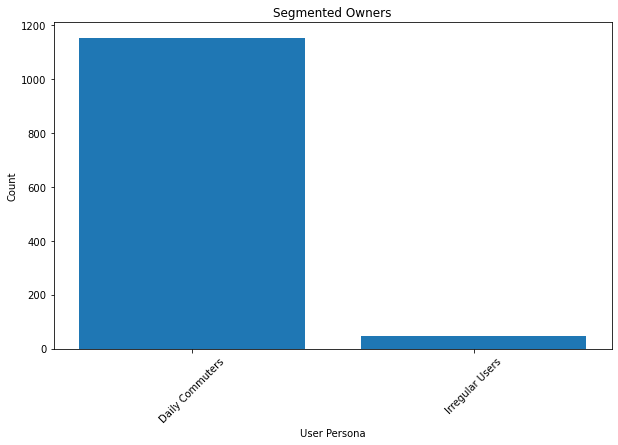

In [17]:
import matplotlib.pyplot as plt

# Visualize the segmented owners
plt.figure(figsize=(10, 6))
plt.bar(segmented_data['UserPersona'], segmented_data['Count'])
plt.xlabel('User Persona')
plt.ylabel('Count')
plt.title('Segmented Owners')
plt.xticks(rotation=45)
plt.show()

# Product Strategy and Insights

### 1) Average vehicle age for each persona

We calculate the average vehicle age for each persona. By understanding the average age of vehicles owned by different user personas, we can tailor insurance coverage and product offerings to suit the specific needs of each segment. For example, older vehicle owners may benefit from more extensive coverage options.

In [18]:
vehicle_age_distribution = df.groupby('UserPersona')['VehicleAge'].mean()
print("\nAverage Vehicle Age by Persona:\n", vehicle_age_distribution)


Average Vehicle Age by Persona:
 UserPersona
Daily Commuters    12.432292
Irregular Users    85.936170
Name: VehicleAge, dtype: float64


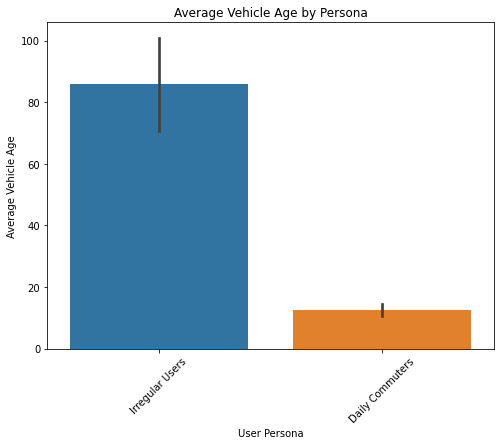

In [19]:
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.barplot(x='UserPersona', y='VehicleAge', data=df)
plt.xlabel('User Persona')
plt.ylabel('Average Vehicle Age')
plt.title('Average Vehicle Age by Persona')
plt.xticks(rotation=45)
plt.show()

#### It indicates that daily commuters tend to own relatively newer vehicles, while irregular users have significantly older vehicles on average.


### 2) Average insurance renewal rate for each persona

In [20]:
average_renewal_rate_by_persona = df.groupby('UserPersona')['InsuranceRenewed'].mean()
print("\nAverage Insurance Renewal Rate by Persona:")
print(average_renewal_rate_by_persona)


Average Insurance Renewal Rate by Persona:
UserPersona
Daily Commuters    1.0
Irregular Users    0.0
Name: InsuranceRenewed, dtype: float64


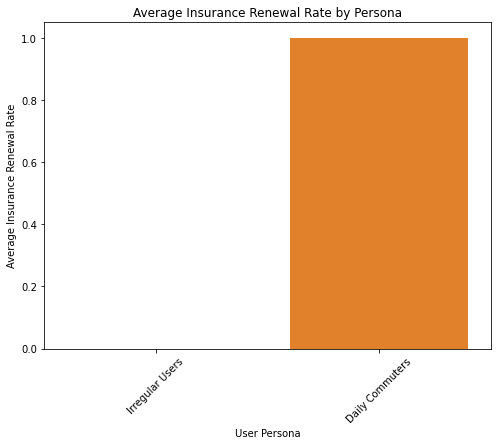

In [21]:
plt.figure(figsize=(8, 6))
sns.barplot(x='UserPersona', y='InsuranceRenewed', data=df, estimator=lambda x: sum(x)/len(x))
plt.xlabel('User Persona')
plt.ylabel('Average Insurance Renewal Rate')
plt.title('Average Insurance Renewal Rate by Persona')
plt.xticks(rotation=45)
plt.show()

#### "Daily Commuters": 
The average insurance renewal rate for daily commuters is 1.0. This means that, on average, all daily commuters in the dataset have renewed their vehicle insurance. A renewal rate of 1.0 indicates that every daily commuter has an active and renewed insurance policy.

#### "Irregular Users": 
The average insurance renewal rate for irregular users is 0.0. This suggests that, on average, none of the irregular users in the dataset have renewed their vehicle insurance. A renewal rate of 0.0 indicates that there are no active and renewed insurance policies for irregular users in the dataset.

### We can develop targeted strategies for engaging irregular users and encouraging them to renew their insurance, such as : 


- <b>Personalized Reminders:</b> Sending personalized reminders to irregular users before their insurance expires is crucial. By addressing users by name and providing specific policy details, the insurance company can create a sense of urgency and importance around insurance renewal. Personalized reminders are more likely to capture users' attention and prompt them to take action.

- <b>Incentives and Discounts:</b> Offering attractive incentives and discounts can be a powerful motivator for irregular users to renew their insurance. Loyalty discounts, no-claim bonuses, and special renewal offers can entice users to renew their insurance on time. Discounts can create a sense of value and reward for users who stay loyal to the insurance company.

### 3) Blacklisting Frequency for Irregular Users

In [22]:
irregular_users_blacklisting = df[df['UserPersona'] == 'Irregular Users']['BlacklistingFrequency'].mean()
print("\nAverage Blacklisting Frequency for Irregular Users: {:.2f}".format(irregular_users_blacklisting))


Average Blacklisting Frequency for Irregular Users: 0.00


This means that Irregular Users, as identified by the user persona classification, do not have any incidents of being blacklisted based on the available data.

### Implications & Actions :

- <b>Customer Engagement:</b> Since Irregular Users have a clean track record without any blacklisting incidents, insurance companies can leverage this information to engage with them proactively. Providing personalized offers, discounts, or loyalty rewards can be effective strategies to attract and retain these responsible customers.

- <b>Safe Driving Incentives:</b> Considering the low blacklisting frequency, insurance companies can introduce safe driving incentive programs for Irregular Users. These incentives could include safe driver discounts, rewards for maintaining a clean driving record, or bonus coverage for accident-free years.

# PART 2

### We can define the buying tendency for Daily Commuters and Irregular Users based on whether their insurance is renewed or not. 

- For Daily Commuters, if their insurance is renewed (InsuranceRenewed == 1), they are classified as having a <b>"High"</b> buying tendency. If their insurance is not renewed and the expiration date is within 30 days (vehicleInsuranceUpto < datetime.now() + pd.Timedelta(days=30)), they are classified as having a <b>"Medium"</b> buying tendency. For Irregular Users, if their insurance is renewed (InsuranceRenewed == 1), they are classified as having a "Medium" buying tendency, and if it is not renewed, they are classified as having a <b>"Low"</b> buying tendency.

In [23]:
def assign_buying_tendency(row):
    if row['UserPersona'] == 'Daily Commuters':
        if row['InsuranceRenewed'] == 1:
            return 'High'
        elif datetime.now() < row['vehicleInsuranceUpto'] < datetime.now() + pd.Timedelta(days=30):
            return 'Medium'
        else:
            return 'Low'
    elif row['UserPersona'] == 'Irregular Users':
        if row['InsuranceRenewed'] == 1:
            return 'Medium'
        else:
            return 'Low'
    else:
        return 'Low'  # For other personas, assume low tendency

# Apply the function to create a new column 'BuyingTendency'
df['BuyingTendency'] = df.apply(assign_buying_tendency, axis=1)

# Print some rows to see the values of 'vehicleInsuranceUpto' and 'BuyingTendency'
print(df[['vehicleInsuranceUpto', 'BuyingTendency']])

# Count the number of owners in each buying tendency bracket
buying_tendency_counts = df['BuyingTendency'].value_counts()

# Check if "Medium" and "High" exist in the value counts and if not, add them with a count of 0
if 'Medium' not in buying_tendency_counts.index:
    buying_tendency_counts['Medium'] = 0
if 'High' not in buying_tendency_counts.index:
    buying_tendency_counts['High'] = 0

# Sort the value counts by index (buying tendency)
buying_tendency_counts = buying_tendency_counts.sort_index()

# Print the results
print("Buying Tendency of Insurance:")
print(buying_tendency_counts)

     vehicleInsuranceUpto BuyingTendency
0              2022-10-09            Low
1              2023-04-22            Low
2              2022-09-21            Low
3              2016-09-24            Low
4              2016-09-24            Low
...                   ...            ...
1194           2027-10-06           High
1195           2027-06-19           High
1196           2027-08-28           High
1197           2027-08-10           High
1198           2027-06-11           High

[1199 rows x 2 columns]
Buying Tendency of Insurance:
High      1152
Low         47
Medium       0
Name: BuyingTendency, dtype: int64


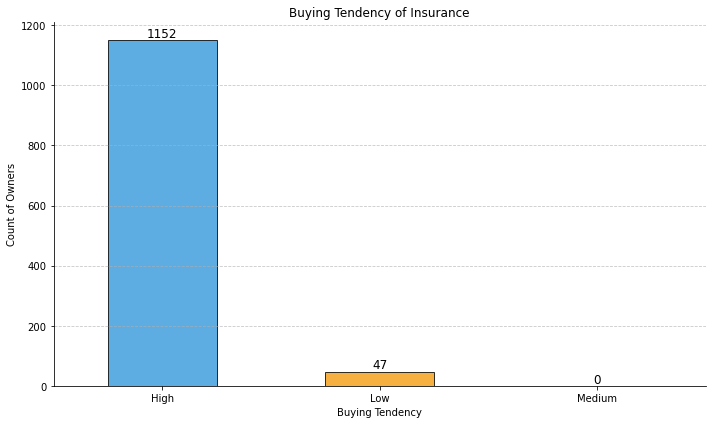

In [24]:
# Creating an attractive bar plot for the buying tendency counts
plt.figure(figsize=(10, 6))
colors = ['#3498db', '#f39c12', '#2ecc71']
buying_tendency_counts.plot(kind='bar', color=colors, edgecolor='black', alpha=0.8)

plt.title('Buying Tendency of Insurance')
plt.xlabel('Buying Tendency')
plt.ylabel('Count of Owners')
plt.xticks(rotation=0)

for index, value in enumerate(buying_tendency_counts):
    plt.text(index, value, str(value), ha='center', va='bottom', fontsize=12)

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# PART 3

To define the buying capability of insurance for customers, we need to assess their likelihood to renew the insurance. This can be done by calculating the insurance renewal rate for each customer, which represents the percentage of times they have renewed their insurance in the past.

## The overall approach allows us to categorize customers based on their insurance renewal rates into three capability brackets, providing insights into the distribution of customers based on their capability to renew insurance.

In [25]:
# Calculate Insurance Renewal Rates for each customer
insurance_renewal_rates = df.groupby('owner')['InsuranceRenewed'].apply(lambda x: (x == 'YES').mean()).reset_index()
insurance_renewal_rates.columns = ['owner', 'InsuranceRenewalRate']

# Merge the insurance renewal rates with the original data
df = df.merge(insurance_renewal_rates, on='owner')

# Define the capability brackets
df['BuyingCapability'] = pd.cut(df['InsuranceRenewalRate'], bins=[0, 0.3, 0.7, 1.0], labels=['Low', 'Medium', 'High'], right=False)

# Count the number of customers in each capability bracket
buying_capability_counts = df['BuyingCapability'].value_counts()

# Print the results
print("Buying Capability of Insurance:")
print(buying_capability_counts)


Buying Capability of Insurance:
Low       1199
Medium       0
High         0
Name: BuyingCapability, dtype: int64


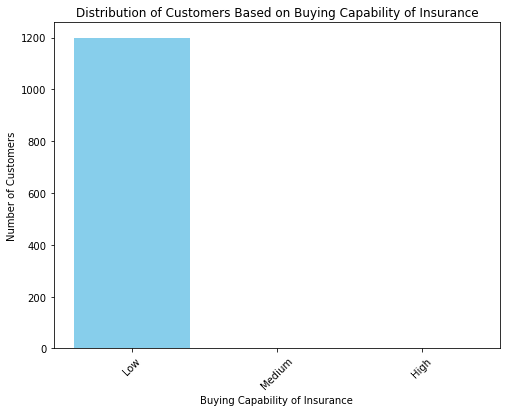

In [26]:
plt.figure(figsize=(8, 6))
plt.bar(buying_capability_counts.index, buying_capability_counts.values, color='skyblue')
plt.xlabel('Buying Capability of Insurance')
plt.ylabel('Number of Customers')
plt.title('Distribution of Customers Based on Buying Capability of Insurance')
plt.xticks(rotation=45)
plt.show()